<a href="https://colab.research.google.com/github/kalyanimane/data-science-assignments/blob/main/SVM_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
mushroom_data=pd.read_csv("/content/mushroom.csv")

In [5]:
mushroom_data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [6]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [7]:
mushroom_data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


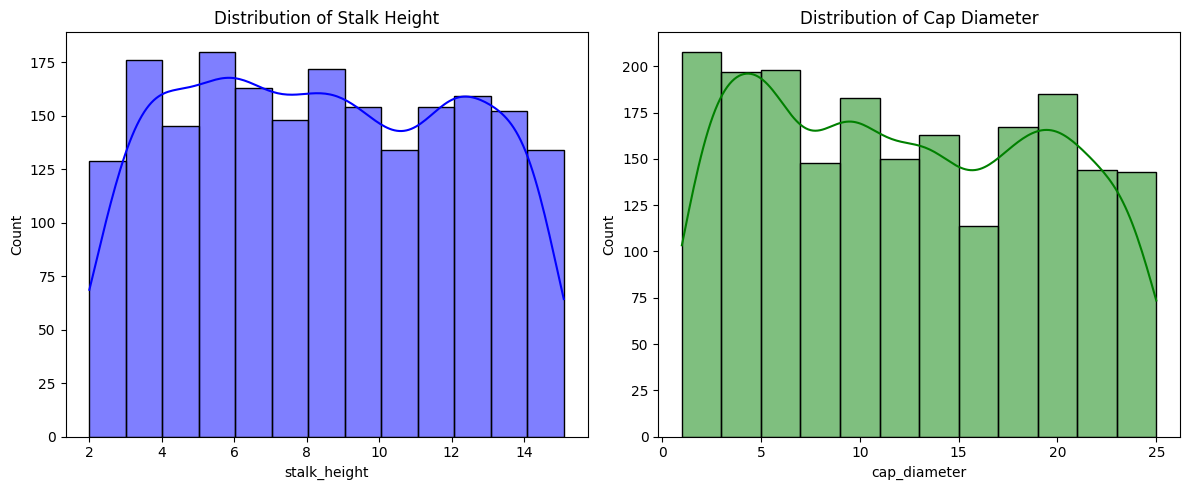

(None,
         Unnamed: 0  stalk_height  cap_diameter
 count  2000.000000   2000.000000   2000.000000
 mean    624.974000      8.449118     12.314345
 std     375.091938      3.697217      7.048845
 min       0.000000      2.000000      1.000000
 25%     290.000000      5.291009      5.723521
 50%     607.000000      8.318596     12.124902
 75%     957.250000     11.781272     18.698605
 max    1279.000000     15.095066     25.000054)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical features
summary_stats = mushroom_data.describe()

# Visualize the distribution of the numerical features
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(mushroom_data['stalk_height'], kde=True, ax=axs[0], color='blue')
axs[0].set_title('Distribution of Stalk Height')

sns.histplot(mushroom_data['cap_diameter'], kde=True, ax=axs[1], color='green')
axs[1].set_title('Distribution of Cap Diameter')

plt.tight_layout()
plt.show(), summary_stats


In [ ]:
 #step 2

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoded_data = mushroom_data.copy()
label_encoders = {}

for column in encoded_data.columns:
    if encoded_data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        encoded_data[column] = label_encoders[column].fit_transform(encoded_data[column])

# Split the data into features and target
X = encoded_data.drop(columns=['class'])
y = encoded_data['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 25), (600, 25), (1400,), (600,))

In [ ]:
# step 3

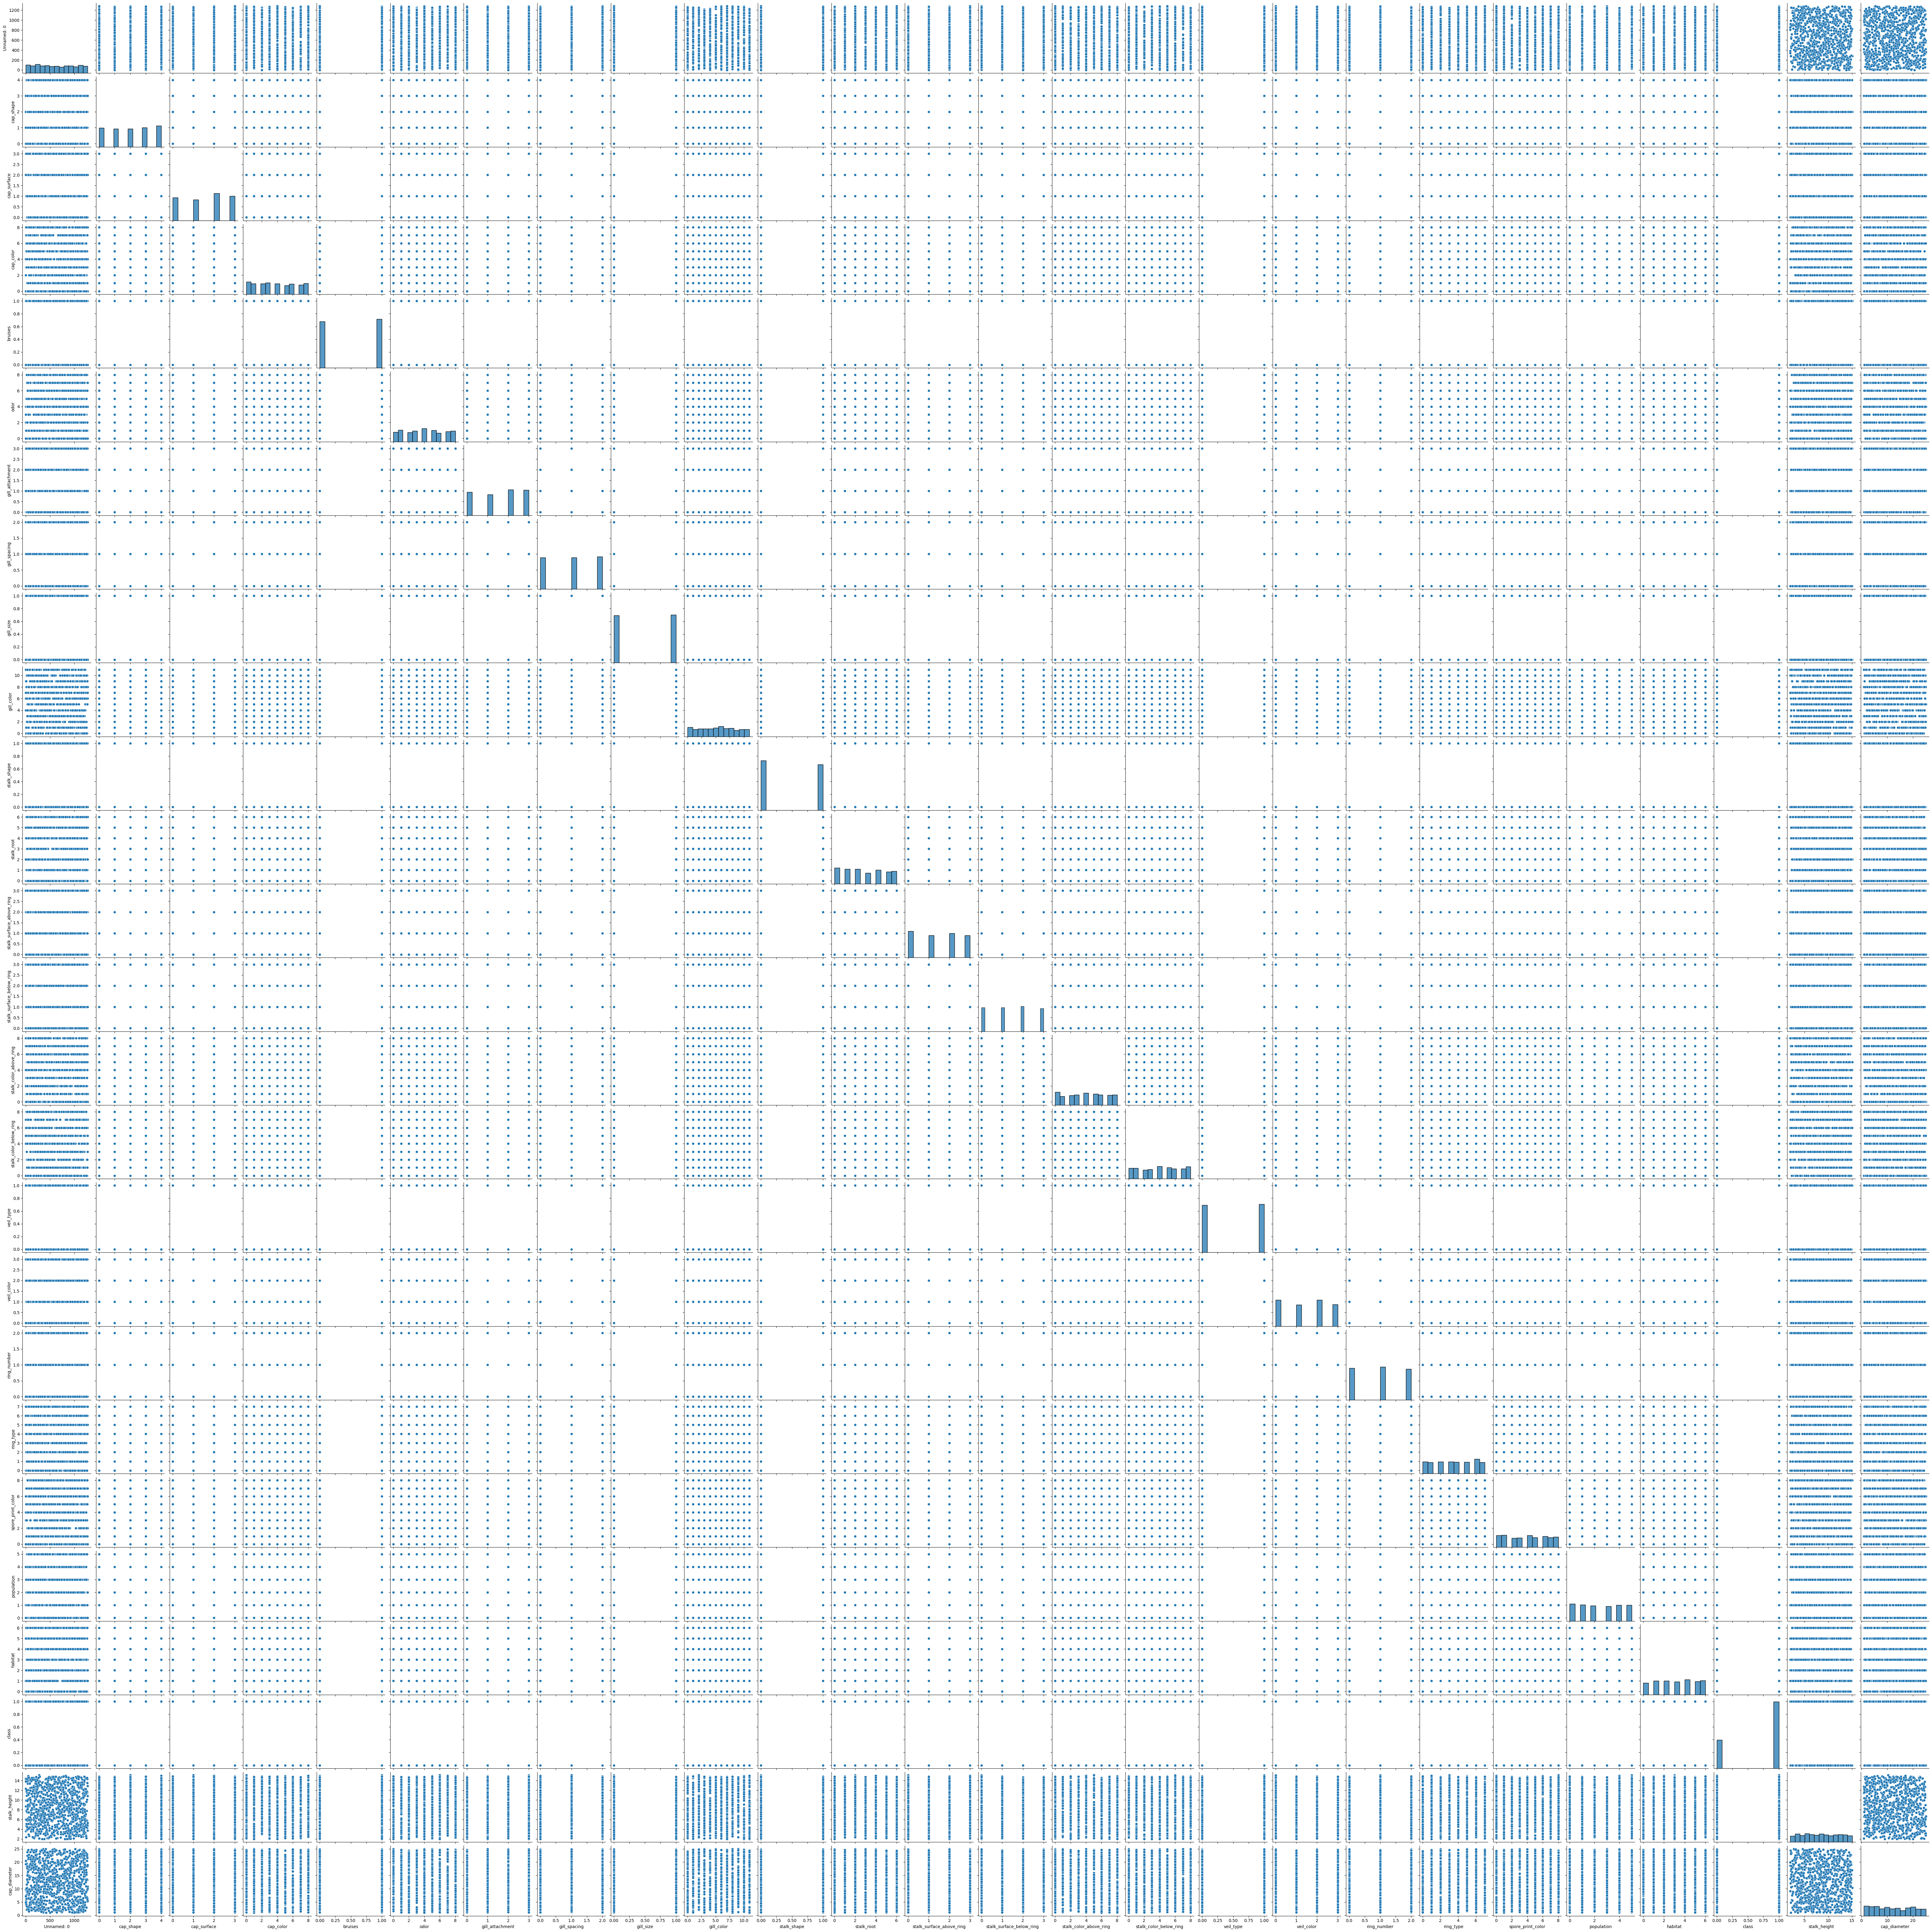

In [10]:
# Pair plots, scatter plots, and more can be created here
sns.pairplot(encoded_data)
plt.show()


In [ ]:
# step 4

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.6916666666666667,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       185\n           1       0.69      1.00      0.82       415\n\n    accuracy                           0.69       600\n   macro avg       0.35      0.50      0.41       600\nweighted avg       0.48      0.69      0.57       600\n')

In [ ]:
#step 5

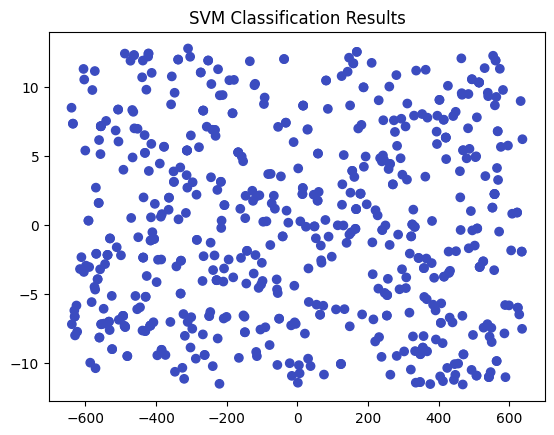

In [12]:
# Visualization of the SVM results, like plotting the decision boundaries (only feasible in 2D)
from sklearn.decomposition import PCA

# Reduce the dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='coolwarm')
plt.title('SVM Classification Results')
plt.show()


In [ ]:
# step 6

In [13]:
# Experiment with different kernels and hyperparameters
svm_model_rbf = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42)
svm_model_rbf.fit(X_train, y_train)
y_pred_rbf = svm_model_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
classification_rep_rbf = classification_report(y_test, y_pred_rbf)

print(f"RBF Kernel Accuracy: {accuracy_rbf}")
print(classification_rep_rbf)

RBF Kernel Accuracy: 0.8816666666666667
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       185
           1       0.85      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.93      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600



In [ ]:
# step 7

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    # Initialize the model
    svm_model = SVC(kernel=kernel, random_state=42)
    # Train the model
    svm_model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = svm_model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[kernel] = {'accuracy': accuracy, 'report': report}

# Display the results
for kernel, metrics in results.items():
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report: \n{classification_report(y_test, svm_model.predict(X_test))}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


Kernel: linear
Accuracy: 0.6916666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Kernel: poly
Accuracy: 0.6916666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Kernel: rbf
Accuracy: 0.6916666666666667
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [16]:
"""Analyze SVM Strengths and Weaknesses for the Mushroom Dataset
Strengths:

Flexibility with RBF Kernel: SVM with an RBF kernel effectively handles the non-linear relationships in the Mushroom dataset.
Effective on High-Dimensional Data: SVMs work well with datasets where the number of features is large compared to the number of observations.
Weaknesses:

Computational Cost: Training SVMs, especially with non-linear kernels, can be computationally expensive, particularly on larger datasets.
Sensitivity to Parameter Tuning: The performance of SVMs heavily depends on the correct setting of hyperparameters like C (regularization) and gamma (for RBF kernel). Improper tuning can lead to suboptimal performance. """

'Analyze SVM Strengths and Weaknesses for the Mushroom Dataset\nStrengths:\n\nFlexibility with RBF Kernel: SVM with an RBF kernel effectively handles the non-linear relationships in the Mushroom dataset.\nEffective on High-Dimensional Data: SVMs work well with datasets where the number of features is large compared to the number of observations.\nWeaknesses:\n\nComputational Cost: Training SVMs, especially with non-linear kernels, can be computationally expensive, particularly on larger datasets.\nSensitivity to Parameter Tuning: The performance of SVMs heavily depends on the correct setting of hyperparameters like C (regularization) and gamma (for RBF kernel). Improper tuning can lead to suboptimal performance. '

In [17]:
"""Discuss Practical Implications of SVM in Real-World Classification Tasks
SVMs are widely used in various real-world applications due to their versatility and effectiveness:

Text Classification:

SVMs are extensively used in text classification tasks like spam detection, sentiment analysis, and document categorization. Their ability to handle high-dimensional feature spaces (e.g., words or n-grams in text) makes them well-suited for these tasks.
Image Recognition:

In image classification, SVMs are often used as part of more extensive machine learning pipelines. They excel in scenarios where the relationship between pixel intensities and class labels is complex.
Bioinformatics:

SVMs are also popular in bioinformatics for tasks like classifying protein structures or predicting the activity of genes. Their robustness and ability to handle noisy data are key advantages in this field.
Challenges:

Despite their strengths, SVMs can struggle with large datasets due to their computational complexity. Moreover, they require careful parameter tuning and are not easily interpretable, which can be a drawback in applications where model transparency is crucial. """

'Discuss Practical Implications of SVM in Real-World Classification Tasks\nSVMs are widely used in various real-world applications due to their versatility and effectiveness:\n\nText Classification:\n\nSVMs are extensively used in text classification tasks like spam detection, sentiment analysis, and document categorization. Their ability to handle high-dimensional feature spaces (e.g., words or n-grams in text) makes them well-suited for these tasks.\nImage Recognition:\n\nIn image classification, SVMs are often used as part of more extensive machine learning pipelines. They excel in scenarios where the relationship between pixel intensities and class labels is complex.\nBioinformatics:\n\nSVMs are also popular in bioinformatics for tasks like classifying protein structures or predicting the activity of genes. Their robustness and ability to handle noisy data are key advantages in this field.\nChallenges:\n\nDespite their strengths, SVMs can struggle with large datasets due to their c